In [17]:
from decimal import Decimal # for filenames

import pdb #Equivalent of keyboard in MATLAB, just add "pdb.set_trace()"

import os
import sys

In [18]:
###############################################################################
#                       HyperParameters and RunOptions                        #
###############################################################################
class Hyperparameters:
    max_hidden_layers =7# For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  =100
    activation        = 'elu'
    classification_act= 'linear'
    model_constraint  =  1
    regularization    = 0.0
    manifold          = 0.000
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 500
    num_epochs        = 2000
    
    num_networks      = 6
    

In [19]:
import tensorflow as tf
from mat4py import loadmat
import numpy as np
import pandas as pd
from Utilities.plotting_sine import plot_sine
from Utilities.get_image_data import load_data
from Utilities.form_train_val_test_batches import form_train_val_test_batches
from Utilities.NN_FC_layerwise import FCLayerwise
from Utilities.NN_FC_layerwise_new import FCLayerwise_new
from Utilities.NETW import Final
from Utilities.Net import Final_Network
from Utilities.Net_new import Final_Network_ALGO_II
from Utilities.create_data import create_new
from Utilities.create_data_multiply import create_new_multiply
from Utilities.L2_error_computation import error_L2
from Utilities.loss_and_accuracies import data_loss_classification, data_loss_regression
from Utilities.manifold_regularization import manifold_classification
from Utilities.model_constraint import compute_interior_loss
from Utilities.model_constraint_weak import compute_interior_loss_weak
from Utilities.manifold_regularization_new import manifold_classification_new
from Utilities.optimize_layerwise import optimize
from Utilities.optimize_step_II import optimize_step
from Utilities.additive_output import net_output 
from Utilities.plot_and_save_figures_layerwise import plot_fig
from joblib import Parallel, delayed
import multiprocessing
import random

In [20]:
class Hyperparameters_new:
    max_hidden_layers = 3 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 20
    activation        = 'relu'
    classification_act= 'linear'
    regularization    = 0.000
    manifold          = 0.000
    model_constraint  =  60
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 500
    num_epochs        = 5000

In [21]:
class RunOptions:
    def __init__(self):    
        #=== Choose Which GPU to Use ===#
        self.which_gpu = '1'
        
        #=== Use L_1 Regularization ===#
        self.use_L1 = 1
        
        #=== Choose Data Set ===#
        self.data_MNIST = 0
        self.data_CIFAR10 = 0 
        self.data_CIFAR100 = 0
        self.data_regression=1
        
        #=== Random Seed ===#
        self.random_seed = 1234


In [22]:
###############################################################################
#                                 File Paths                                  #
###############################################################################         
class FilePaths():    
    def __init__(self, hyperp, run_options):  
        #=== Declaring File Name Components ===# 
        self.NN_type = 'FC'
        if run_options.data_MNIST == 1:
            self.dataset = 'MNIST'
        if run_options.data_CIFAR10 == 1:
            self.dataset = 'CIFAR10'
        if run_options.data_CIFAR100 == 1:
            self.dataset = 'CIFAR100'
        if run_options.data_regression == 1:
            self.dataset = 'Abalone'
        if hyperp.regularization >= 1:
            hyperp.regularization = int(hyperp.regularization)
            regularization_string = str(hyperp.regularization)
        else:
            regularization_string = str(hyperp.regularization)
            regularization_string = 'pt' + regularization_string[2:]                        
        node_TOL_string = str('%.2e' %Decimal(hyperp.node_TOL))
        node_TOL_string = node_TOL_string[-1]
        error_TOL_string = str('%.2e' %Decimal(hyperp.error_TOL))
        error_TOL_string = error_TOL_string[-1]
        
        #=== File Name ===#
        if run_options.use_L1 == 0:
            self.filename = self.dataset + '_' + self.NN_type + '_mhl%d_hl%d_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)
        else:
            self.filename = self.dataset + '_' + self.NN_type + '_L1_mhl%d_hl%d_r%s_nTOL%s_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, regularization_string, node_TOL_string, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)

        #=== Saving Trained Neural Network and Tensorboard ===#
        #self.NN_savefile_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Trained_NNs/' + self.filename # Since we need to save four different types of files to save a neural network model, we need to create a new folder for each model
        self.NN_savefile_directory =  self.filename
        self.NN_savefile_name = self.NN_savefile_directory + '/' + self.filename # The file path and name for the four files
        #self.tensorboard_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Tensorboard/' + self.filename

###############################################################################



ListWrapper([2, 100, 100, 1])
Beginning Training
            Epoch 0            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Model: "fc_layerwise_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
W2 (Dense)                   multiple                  10100     
_________________________________________________________________
W3 (Dense)                   multiple                  10100     
_________________________________________________________________
W4 (Dense)                   multiple                  10100     
_________________________________________________________________
W5 (Dense)                   multiple                  10100     
_________________________________________________________________
W6 (Dense)                   multiple                  10100     
_________________________________________

Time per Epoch: 2.62

Training Set: Loss: 1.160e-02, Accuracy: 40.731
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 4.182

Previous Layer Relative # of 0s: 0.0000000

            Epoch 16            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.51

Training Set: Loss: 1.149e-02, Accuracy: 40.606
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 4.154

Previous Layer Relative # of 0s: 0.0000000

            Epoch 17            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 1.267e-02, Accuracy: 40.575
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 4.224

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Batch: 0.18
Time per Epoch: 2.77

Training Set: Loss: 2.563e-02, Accuracy: 38.167
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.461

Previous Layer Relative # of 0s: 0.0000000

            Epoch 35            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.69

Training Set: Loss: 2.618e-02, Accuracy: 38.091
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.526

Previous Layer Relative # of 0s: 0.0000000

            Epoch 36            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.68

Training Set: Loss: 2.660e-02, Accuracy: 38.001
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.439

Previous Layer Relative # of 0s: 0.000

Time per Epoch: 2.44

Training Set: Loss: 3.894e-02, Accuracy: 37.411
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.232

Previous Layer Relative # of 0s: 0.0000000

            Epoch 53            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.51

Training Set: Loss: 3.473e-02, Accuracy: 36.757
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.274

Previous Layer Relative # of 0s: 0.0000000

            Epoch 54            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.52

Training Set: Loss: 3.627e-02, Accuracy: 36.822
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.214

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Batch: 0.16
Time per Epoch: 2.50

Training Set: Loss: 4.131e-02, Accuracy: 36.136
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.068

Previous Layer Relative # of 0s: 0.0000000

            Epoch 72            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.40

Training Set: Loss: 4.090e-02, Accuracy: 36.020
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.077

Previous Layer Relative # of 0s: 0.0000000

            Epoch 73            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.46

Training Set: Loss: 4.101e-02, Accuracy: 36.104
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 3.053

Previous Layer Relative # of 0s: 0.000

Time per Epoch: 2.49

Training Set: Loss: 4.361e-02, Accuracy: 34.749
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.785

Previous Layer Relative # of 0s: 0.0000000

            Epoch 90            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.51

Training Set: Loss: 4.323e-02, Accuracy: 34.500
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.829

Previous Layer Relative # of 0s: 0.0000000

            Epoch 91            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.54

Training Set: Loss: 4.379e-02, Accuracy: 34.695
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.785

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 2.40

Training Set: Loss: 4.419e-02, Accuracy: 32.504
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.458

Previous Layer Relative # of 0s: 0.0000000

            Epoch 108            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.46

Training Set: Loss: 4.469e-02, Accuracy: 32.417
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.657

Previous Layer Relative # of 0s: 0.0000000

            Epoch 109            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.49

Training Set: Loss: 4.807e-02, Accuracy: 32.803
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.556

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.69

Training Set: Loss: 3.868e-02, Accuracy: 30.730
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.339

Previous Layer Relative # of 0s: 0.0000000

            Epoch 126            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.61

Training Set: Loss: 4.142e-02, Accuracy: 31.052
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.558

Previous Layer Relative # of 0s: 0.0000000

            Epoch 127            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.54

Training Set: Loss: 4.064e-02, Accuracy: 30.842
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.377

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.53

Training Set: Loss: 4.302e-02, Accuracy: 30.350
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.248

Previous Layer Relative # of 0s: 0.0000000

            Epoch 144            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.47

Training Set: Loss: 4.429e-02, Accuracy: 30.612
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.472

Previous Layer Relative # of 0s: 0.0000000

            Epoch 145            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.56

Training Set: Loss: 3.765e-02, Accuracy: 29.352
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.195

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.49

Training Set: Loss: 4.325e-02, Accuracy: 29.039
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.069

Previous Layer Relative # of 0s: 0.0000000

            Epoch 162            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.49

Training Set: Loss: 4.474e-02, Accuracy: 29.322
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.286

Previous Layer Relative # of 0s: 0.0000000

            Epoch 163            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.49

Training Set: Loss: 4.101e-02, Accuracy: 28.384
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.053

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.49

Training Set: Loss: 4.555e-02, Accuracy: 27.434
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.918

Previous Layer Relative # of 0s: 0.0000000

            Epoch 180            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.48

Training Set: Loss: 4.618e-02, Accuracy: 27.442
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.018

Previous Layer Relative # of 0s: 0.0000000

            Epoch 181            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.48

Training Set: Loss: 4.592e-02, Accuracy: 27.347
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.881

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.52

Training Set: Loss: 4.671e-02, Accuracy: 25.994
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.751

Previous Layer Relative # of 0s: 0.0000000

            Epoch 198            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.60

Training Set: Loss: 4.820e-02, Accuracy: 26.271
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.837

Previous Layer Relative # of 0s: 0.0000000

            Epoch 199            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.41

Training Set: Loss: 4.725e-02, Accuracy: 25.874
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.731

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.60

Training Set: Loss: 4.893e-02, Accuracy: 25.420
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.638

Previous Layer Relative # of 0s: 0.0000000

            Epoch 216            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.55

Training Set: Loss: 4.797e-02, Accuracy: 25.271
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.724

Previous Layer Relative # of 0s: 0.0000000

            Epoch 217            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.55

Training Set: Loss: 4.779e-02, Accuracy: 24.877
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.591

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.44

Training Set: Loss: 4.048e-02, Accuracy: 22.918
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.482

Previous Layer Relative # of 0s: 0.0000000

            Epoch 234            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.54

Training Set: Loss: 5.498e-02, Accuracy: 25.718
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.678

Previous Layer Relative # of 0s: 0.0000000

            Epoch 235            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.53

Training Set: Loss: 5.474e-02, Accuracy: 25.399
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.544

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.47

Training Set: Loss: 4.766e-02, Accuracy: 23.572
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.403

Previous Layer Relative # of 0s: 0.0000000

            Epoch 252            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.62

Training Set: Loss: 5.418e-02, Accuracy: 25.015
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.511

Previous Layer Relative # of 0s: 0.0000000

            Epoch 253            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.64

Training Set: Loss: 5.025e-02, Accuracy: 24.066
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.386

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.47

Training Set: Loss: 4.876e-02, Accuracy: 23.215
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.303

Previous Layer Relative # of 0s: 0.0000000

            Epoch 270            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.69

Training Set: Loss: 6.089e-02, Accuracy: 25.238
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.404

Previous Layer Relative # of 0s: 0.0000000

            Epoch 271            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.61

Training Set: Loss: 5.956e-02, Accuracy: 25.420
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.449

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.57

Training Set: Loss: 4.825e-02, Accuracy: 22.915
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.348

Previous Layer Relative # of 0s: 0.0000000

            Epoch 288            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.53

Training Set: Loss: 5.072e-02, Accuracy: 23.601
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.410

Previous Layer Relative # of 0s: 0.0000000

            Epoch 289            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 4.346e-02, Accuracy: 21.926
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.234

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.47

Training Set: Loss: 4.058e-02, Accuracy: 21.700
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.158

Previous Layer Relative # of 0s: 0.0000000

            Epoch 306            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.43

Training Set: Loss: 3.859e-02, Accuracy: 21.190
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.294

Previous Layer Relative # of 0s: 0.0000000

            Epoch 307            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.46

Training Set: Loss: 4.258e-02, Accuracy: 22.368
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.239

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.51

Training Set: Loss: 4.155e-02, Accuracy: 21.336
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.095

Previous Layer Relative # of 0s: 0.0000000

            Epoch 324            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.57

Training Set: Loss: 4.202e-02, Accuracy: 21.522
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.221

Previous Layer Relative # of 0s: 0.0000000

            Epoch 325            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.46

Training Set: Loss: 4.009e-02, Accuracy: 21.335
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.098

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.53

Training Set: Loss: 4.392e-02, Accuracy: 21.169
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.120

Previous Layer Relative # of 0s: 0.0000000

            Epoch 342            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.51

Training Set: Loss: 4.343e-02, Accuracy: 21.344
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.144

Previous Layer Relative # of 0s: 0.0000000

            Epoch 343            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.47

Training Set: Loss: 4.478e-02, Accuracy: 21.272
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.121

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.55

Training Set: Loss: 4.864e-02, Accuracy: 21.607
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.044

Previous Layer Relative # of 0s: 0.0000000

            Epoch 360            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.55

Training Set: Loss: 4.327e-02, Accuracy: 20.083
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.133

Previous Layer Relative # of 0s: 0.0000000

            Epoch 361            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 5.121e-02, Accuracy: 21.440
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.096

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.66

Training Set: Loss: 4.783e-02, Accuracy: 21.129
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.980

Previous Layer Relative # of 0s: 0.0000000

            Epoch 378            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.50

Training Set: Loss: 6.877e-02, Accuracy: 24.538
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.205

Previous Layer Relative # of 0s: 0.0000000

            Epoch 379            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.54

Training Set: Loss: 5.521e-02, Accuracy: 22.447
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.952

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 3.08

Training Set: Loss: 4.453e-02, Accuracy: 19.509
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.937

Previous Layer Relative # of 0s: 0.0000000

            Epoch 396            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.01

Training Set: Loss: 5.284e-02, Accuracy: 21.056
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.084

Previous Layer Relative # of 0s: 0.0000000

            Epoch 397            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.03

Training Set: Loss: 4.211e-02, Accuracy: 19.700
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.964

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.96

Training Set: Loss: 6.297e-02, Accuracy: 24.002
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.223

Previous Layer Relative # of 0s: 0.0000000

            Epoch 414            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.98

Training Set: Loss: 4.779e-02, Accuracy: 20.541
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.928

Previous Layer Relative # of 0s: 0.0000000

            Epoch 415            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.94

Training Set: Loss: 4.537e-02, Accuracy: 19.853
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.006

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 3.07

Training Set: Loss: 4.398e-02, Accuracy: 18.968
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.902

Previous Layer Relative # of 0s: 0.0000000

            Epoch 432            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 3.41

Training Set: Loss: 4.000e-02, Accuracy: 17.654
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.884

Previous Layer Relative # of 0s: 0.0000000

            Epoch 433            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 3.31

Training Set: Loss: 4.878e-02, Accuracy: 19.772
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.831

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 3.03

Training Set: Loss: 4.102e-02, Accuracy: 19.755
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.978

Previous Layer Relative # of 0s: 0.0000000

            Epoch 450            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.02

Training Set: Loss: 3.322e-02, Accuracy: 17.899
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.900

Previous Layer Relative # of 0s: 0.0000000

            Epoch 451            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 3.05

Training Set: Loss: 4.137e-02, Accuracy: 17.877
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.849

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.98

Training Set: Loss: 4.153e-02, Accuracy: 17.626
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.831

Previous Layer Relative # of 0s: 0.0000000

            Epoch 468            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.98

Training Set: Loss: 4.470e-02, Accuracy: 19.051
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.887

Previous Layer Relative # of 0s: 0.0000000

            Epoch 469            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.25

Training Set: Loss: 4.270e-02, Accuracy: 18.745
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.809

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 3.43

Training Set: Loss: 5.072e-02, Accuracy: 20.499
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.985

Previous Layer Relative # of 0s: 0.0000000

            Epoch 486            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 3.27

Training Set: Loss: 3.924e-02, Accuracy: 18.586
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.762

Previous Layer Relative # of 0s: 0.0000000

            Epoch 487            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 3.18

Training Set: Loss: 3.882e-02, Accuracy: 16.825
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.738

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.98

Training Set: Loss: 3.201e-02, Accuracy: 17.482
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.760

Previous Layer Relative # of 0s: 0.0000000

            Epoch 504            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.96

Training Set: Loss: 2.930e-02, Accuracy: 16.240
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.833

Previous Layer Relative # of 0s: 0.0000000

            Epoch 505            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.95

Training Set: Loss: 3.440e-02, Accuracy: 17.605
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.753

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.92

Training Set: Loss: 3.758e-02, Accuracy: 15.997
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.732

Previous Layer Relative # of 0s: 0.0000000

            Epoch 522            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.98

Training Set: Loss: 4.298e-02, Accuracy: 16.891
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.759

Previous Layer Relative # of 0s: 0.0000000

            Epoch 523            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.13

Training Set: Loss: 4.652e-02, Accuracy: 18.984
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.682

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.69

Training Set: Loss: 4.729e-02, Accuracy: 17.206
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.693

Previous Layer Relative # of 0s: 0.0000000

            Epoch 540            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.60

Training Set: Loss: 4.433e-02, Accuracy: 17.132
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.723

Previous Layer Relative # of 0s: 0.0000000

            Epoch 541            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.54

Training Set: Loss: 4.213e-02, Accuracy: 17.319
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.723

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.53

Training Set: Loss: 4.074e-02, Accuracy: 16.859
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.718

Previous Layer Relative # of 0s: 0.0000000

            Epoch 558            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.47

Training Set: Loss: 4.100e-02, Accuracy: 17.375
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.672

Previous Layer Relative # of 0s: 0.0000000

            Epoch 559            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.52

Training Set: Loss: 3.861e-02, Accuracy: 15.515
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.668

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.46

Training Set: Loss: 4.540e-02, Accuracy: 16.785
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.567

Previous Layer Relative # of 0s: 0.0000000

            Epoch 576            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.54

Training Set: Loss: 3.396e-02, Accuracy: 14.730
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.673

Previous Layer Relative # of 0s: 0.0000000

            Epoch 577            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.49

Training Set: Loss: 3.655e-02, Accuracy: 13.555
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.575

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.56

Training Set: Loss: 3.160e-02, Accuracy: 13.991
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.570

Previous Layer Relative # of 0s: 0.0000000

            Epoch 594            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.50

Training Set: Loss: 4.342e-02, Accuracy: 17.659
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.662

Previous Layer Relative # of 0s: 0.0000000

            Epoch 595            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 3.285e-02, Accuracy: 13.337
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.483

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.47

Training Set: Loss: 4.119e-02, Accuracy: 19.632
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.466

Previous Layer Relative # of 0s: 0.0000000

            Epoch 612            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.43

Training Set: Loss: 2.980e-02, Accuracy: 13.665
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.545

Previous Layer Relative # of 0s: 0.0000000

            Epoch 613            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.67

Training Set: Loss: 3.715e-02, Accuracy: 17.279
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.493

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.58

Training Set: Loss: 2.763e-02, Accuracy: 12.412
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.504

Previous Layer Relative # of 0s: 0.0000000

            Epoch 630            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.55

Training Set: Loss: 3.659e-02, Accuracy: 17.031
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.577

Previous Layer Relative # of 0s: 0.0000000

            Epoch 631            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.51

Training Set: Loss: 2.611e-02, Accuracy: 12.058
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.473

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.51

Training Set: Loss: 4.116e-02, Accuracy: 11.999
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.454

Previous Layer Relative # of 0s: 0.0000000

            Epoch 648            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.55

Training Set: Loss: 4.196e-02, Accuracy: 13.021
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.467

Previous Layer Relative # of 0s: 0.0000000

            Epoch 649            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.50

Training Set: Loss: 4.698e-02, Accuracy: 16.468
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.483

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.57

Training Set: Loss: 3.630e-02, Accuracy: 16.877
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.425

Previous Layer Relative # of 0s: 0.0000000

            Epoch 666            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.58

Training Set: Loss: 3.071e-02, Accuracy: 11.897
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.439

Previous Layer Relative # of 0s: 0.0000000

            Epoch 667            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.48

Training Set: Loss: 3.080e-02, Accuracy: 16.314
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.456

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.45

Training Set: Loss: 2.400e-02, Accuracy: 11.673
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.351

Previous Layer Relative # of 0s: 0.0000000

            Epoch 684            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.55

Training Set: Loss: 2.691e-02, Accuracy: 11.891
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.443

Previous Layer Relative # of 0s: 0.0000000

            Epoch 685            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.56

Training Set: Loss: 2.573e-02, Accuracy: 13.384
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.372

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.53

Training Set: Loss: 4.218e-02, Accuracy: 11.377
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.371

Previous Layer Relative # of 0s: 0.0000000

            Epoch 702            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.62

Training Set: Loss: 5.368e-02, Accuracy: 19.084
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.425

Previous Layer Relative # of 0s: 0.0000000

            Epoch 703            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.66

Training Set: Loss: 3.939e-02, Accuracy: 12.823
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.488

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.59

Training Set: Loss: 2.357e-02, Accuracy: 9.488
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.315

Previous Layer Relative # of 0s: 0.0000000

            Epoch 720            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.53

Training Set: Loss: 3.661e-02, Accuracy: 14.368
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.291

Previous Layer Relative # of 0s: 0.0000000

            Epoch 721            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.53

Training Set: Loss: 2.643e-02, Accuracy: 10.144
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.333

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.65

Training Set: Loss: 2.647e-02, Accuracy: 9.635
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.308

Previous Layer Relative # of 0s: 0.0000000

            Epoch 738            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.71

Training Set: Loss: 3.013e-02, Accuracy: 14.406
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.291

Previous Layer Relative # of 0s: 0.0000000

            Epoch 739            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.72

Training Set: Loss: 1.993e-02, Accuracy: 9.418
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.348

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 3.34

Training Set: Loss: 2.679e-02, Accuracy: 9.087
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.280

Previous Layer Relative # of 0s: 0.0000000

            Epoch 756            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.99

Training Set: Loss: 3.305e-02, Accuracy: 13.536
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.243

Previous Layer Relative # of 0s: 0.0000000

            Epoch 757            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.07

Training Set: Loss: 2.237e-02, Accuracy: 8.933
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.280

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 3.01

Training Set: Loss: 2.760e-02, Accuracy: 9.134
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.249

Previous Layer Relative # of 0s: 0.0000000

            Epoch 774            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.93

Training Set: Loss: 3.560e-02, Accuracy: 13.298
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.316

Previous Layer Relative # of 0s: 0.0000000

            Epoch 775            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.04

Training Set: Loss: 2.702e-02, Accuracy: 8.683
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.241

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 2.88

Training Set: Loss: 2.049e-02, Accuracy: 8.333
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.224

Previous Layer Relative # of 0s: 0.0000000

            Epoch 792            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.08

Training Set: Loss: 3.113e-02, Accuracy: 10.808
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.208

Previous Layer Relative # of 0s: 0.0000000

            Epoch 793            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.05

Training Set: Loss: 2.615e-02, Accuracy: 8.634
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.236

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 3.20

Training Set: Loss: 2.382e-02, Accuracy: 7.996
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.246

Previous Layer Relative # of 0s: 0.0000000

            Epoch 810            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 3.73

Training Set: Loss: 2.572e-02, Accuracy: 11.775
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.224

Previous Layer Relative # of 0s: 0.0000000

            Epoch 811            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 3.17

Training Set: Loss: 2.585e-02, Accuracy: 7.822
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.206

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 3.10

Training Set: Loss: 2.850e-02, Accuracy: 8.188
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.170

Previous Layer Relative # of 0s: 0.0000000

            Epoch 828            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 3.19

Training Set: Loss: 3.412e-02, Accuracy: 11.156
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.225

Previous Layer Relative # of 0s: 0.0000000

            Epoch 829            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 3.07

Training Set: Loss: 2.510e-02, Accuracy: 7.540
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.154

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 3.56

Training Set: Loss: 4.611e-02, Accuracy: 14.254
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.189

Previous Layer Relative # of 0s: 0.0000000

            Epoch 846            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 3.89

Training Set: Loss: 2.824e-02, Accuracy: 7.621
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.177

Previous Layer Relative # of 0s: 0.0000000

            Epoch 847            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.26
Time per Epoch: 3.76

Training Set: Loss: 3.961e-02, Accuracy: 13.258
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.195

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 3.17

Training Set: Loss: 3.416e-02, Accuracy: 10.832
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.183

Previous Layer Relative # of 0s: 0.0000000

            Epoch 864            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 3.06

Training Set: Loss: 1.867e-02, Accuracy: 6.963
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.170

Previous Layer Relative # of 0s: 0.0000000

            Epoch 865            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 3.02

Training Set: Loss: 2.371e-02, Accuracy: 9.866
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.185

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Epoch: 3.15

Training Set: Loss: 4.155e-02, Accuracy: 9.444
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.149

Previous Layer Relative # of 0s: 0.0000000

            Epoch 882            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.05

Training Set: Loss: 3.632e-02, Accuracy: 7.955
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.210

Previous Layer Relative # of 0s: 0.0000000

            Epoch 883            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.02

Training Set: Loss: 3.646e-02, Accuracy: 7.805
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.149

Previous Layer Relative # of 0s: 0.0000000

            Epoc

Time per Batch: 0.22
Time per Epoch: 2.86

Training Set: Loss: 3.013e-02, Accuracy: 9.080
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.211

Previous Layer Relative # of 0s: 0.0000000

            Epoch 901            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.56

Training Set: Loss: 2.866e-02, Accuracy: 8.183
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.193

Previous Layer Relative # of 0s: 0.0000000

            Epoch 902            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.55

Training Set: Loss: 3.481e-02, Accuracy: 9.799
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.246

Previous Layer Relative # of 0s: 0.0000

Time per Epoch: 2.59

Training Set: Loss: 2.532e-02, Accuracy: 7.466
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.185

Previous Layer Relative # of 0s: 0.0000000

            Epoch 919            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.59

Training Set: Loss: 2.970e-02, Accuracy: 8.324
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.199

Previous Layer Relative # of 0s: 0.0000000

            Epoch 920            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.56

Training Set: Loss: 3.379e-02, Accuracy: 8.771
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.219

Previous Layer Relative # of 0s: 0.0000000

            Epoc

Time per Epoch: 2.57

Training Set: Loss: 2.801e-02, Accuracy: 7.583
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.187

Previous Layer Relative # of 0s: 0.0000000

            Epoch 937            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.72

Training Set: Loss: 3.695e-02, Accuracy: 10.146
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.217

Previous Layer Relative # of 0s: 0.0000000

            Epoch 938            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.58

Training Set: Loss: 2.457e-02, Accuracy: 7.517
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.180

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Batch: 0.19
Time per Epoch: 2.68

Training Set: Loss: 2.969e-02, Accuracy: 8.522
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.209

Previous Layer Relative # of 0s: 0.0000000

            Epoch 956            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.67

Training Set: Loss: 2.953e-02, Accuracy: 8.046
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.201

Previous Layer Relative # of 0s: 0.0000000

            Epoch 957            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.67

Training Set: Loss: 3.450e-02, Accuracy: 8.856
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.200

Previous Layer Relative # of 0s: 0.0000

Time per Epoch: 2.64

Training Set: Loss: 2.268e-02, Accuracy: 6.184
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.143

Previous Layer Relative # of 0s: 0.0000000

            Epoch 974            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.68

Training Set: Loss: 2.866e-02, Accuracy: 8.260
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.195

Previous Layer Relative # of 0s: 0.0000000

            Epoch 975            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.67

Training Set: Loss: 2.813e-02, Accuracy: 6.829
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.147

Previous Layer Relative # of 0s: 0.0000000

            Epoc

Time per Batch: 0.15
Time per Epoch: 2.57

Training Set: Loss: 3.511e-02, Accuracy: 9.665
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.196

Previous Layer Relative # of 0s: 0.0000000

            Epoch 993            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.48

Training Set: Loss: 2.654e-02, Accuracy: 6.879
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.138

Previous Layer Relative # of 0s: 0.0000000

            Epoch 994            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.55

Training Set: Loss: 3.107e-02, Accuracy: 9.586
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.223

Previous Layer Relative # of 0s: 0.0000

Time per Batch: 0.17
Time per Epoch: 2.64

Training Set: Loss: 3.252e-02, Accuracy: 9.861
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.202

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1011            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.57

Training Set: Loss: 2.371e-02, Accuracy: 6.073
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.125

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1012            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.58

Training Set: Loss: 3.649e-02, Accuracy: 9.665
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.219

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.16
Time per Epoch: 2.53

Training Set: Loss: 3.283e-02, Accuracy: 7.417
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.166

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1029            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.58

Training Set: Loss: 3.243e-02, Accuracy: 6.676
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.127

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1030            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.50

Training Set: Loss: 2.752e-02, Accuracy: 5.423
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.114

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.17
Time per Epoch: 2.93

Training Set: Loss: 2.985e-02, Accuracy: 7.195
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.175

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1047            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 3.12

Training Set: Loss: 3.173e-02, Accuracy: 6.842
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.121

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1048            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 3.09

Training Set: Loss: 3.337e-02, Accuracy: 7.523
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.172

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.19
Time per Epoch: 2.90

Training Set: Loss: 1.960e-02, Accuracy: 6.630
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.142

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1065            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.89

Training Set: Loss: 2.626e-02, Accuracy: 7.371
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.169

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1066            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.88

Training Set: Loss: 2.744e-02, Accuracy: 7.406
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.167

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.19
Time per Epoch: 2.90

Training Set: Loss: 2.921e-02, Accuracy: 8.375
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.184

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1083            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.91

Training Set: Loss: 2.609e-02, Accuracy: 8.249
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.168

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1084            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.95

Training Set: Loss: 2.072e-02, Accuracy: 6.444
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.136

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.19
Time per Epoch: 2.95

Training Set: Loss: 3.239e-02, Accuracy: 9.382
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.191

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1101            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.90

Training Set: Loss: 2.262e-02, Accuracy: 6.860
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.129

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1102            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.88

Training Set: Loss: 2.217e-02, Accuracy: 7.824
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.161

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.19
Time per Epoch: 2.87

Training Set: Loss: 2.982e-02, Accuracy: 9.837
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.169

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1119            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.88

Training Set: Loss: 1.924e-02, Accuracy: 5.110
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.096

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1120            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.88

Training Set: Loss: 2.791e-02, Accuracy: 8.197
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.167

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.18
Time per Epoch: 2.62

Training Set: Loss: 2.121e-02, Accuracy: 6.526
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.128

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1137            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.44

Training Set: Loss: 2.164e-02, Accuracy: 7.393
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.153

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1138            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.45

Training Set: Loss: 2.172e-02, Accuracy: 6.621
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.114

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.17
Time per Epoch: 2.51

Training Set: Loss: 3.206e-02, Accuracy: 9.308
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.187

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1155            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.48

Training Set: Loss: 1.886e-02, Accuracy: 7.296
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.133

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1156            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.52

Training Set: Loss: 1.674e-02, Accuracy: 5.739
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.121

Previous Layer Relative # of 0s: 0.00

Time per Epoch: 2.43

Training Set: Loss: 3.511e-02, Accuracy: 9.349
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.184

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1173            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.50

Training Set: Loss: 2.412e-02, Accuracy: 7.450
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.174

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1174            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.52

Training Set: Loss: 2.645e-02, Accuracy: 6.675
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.137

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.36

Training Set: Loss: 2.891e-02, Accuracy: 7.661
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.147

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1191            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.42

Training Set: Loss: 2.647e-02, Accuracy: 8.199
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.166

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1192            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.46

Training Set: Loss: 1.884e-02, Accuracy: 7.625
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.162

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.40

Training Set: Loss: 2.256e-02, Accuracy: 7.778
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.154

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1209            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.42

Training Set: Loss: 2.163e-02, Accuracy: 5.471
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.111

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1210            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.57

Training Set: Loss: 2.994e-02, Accuracy: 8.364
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.149

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.43

Training Set: Loss: 2.655e-02, Accuracy: 9.382
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.165

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1227            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.42

Training Set: Loss: 2.229e-02, Accuracy: 6.376
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.112

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1228            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.52

Training Set: Loss: 2.642e-02, Accuracy: 9.887
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.171

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.47

Training Set: Loss: 2.714e-02, Accuracy: 9.445
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.165

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1245            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.40

Training Set: Loss: 2.219e-02, Accuracy: 5.529
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.099

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1246            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.47

Training Set: Loss: 2.540e-02, Accuracy: 9.062
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.166

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.49

Training Set: Loss: 3.152e-02, Accuracy: 10.481
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.180

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1263            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.57

Training Set: Loss: 2.351e-02, Accuracy: 7.014
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.134

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1264            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.48

Training Set: Loss: 2.254e-02, Accuracy: 8.325
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.165

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.49

Training Set: Loss: 3.413e-02, Accuracy: 10.146
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.179

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1281            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.36

Training Set: Loss: 2.595e-02, Accuracy: 7.934
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.142

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1282            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.44

Training Set: Loss: 2.435e-02, Accuracy: 8.691
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.173

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.38

Training Set: Loss: 2.223e-02, Accuracy: 6.481
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.132

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1299            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.43

Training Set: Loss: 2.731e-02, Accuracy: 7.803
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.164

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1300            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.42

Training Set: Loss: 2.056e-02, Accuracy: 8.184
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.173

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.42

Training Set: Loss: 1.944e-02, Accuracy: 5.719
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.106

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1317            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.52

Training Set: Loss: 2.549e-02, Accuracy: 7.481
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.159

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1318            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.47

Training Set: Loss: 2.554e-02, Accuracy: 8.810
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.171

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.52

Training Set: Loss: 1.941e-02, Accuracy: 6.244
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.127

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1335            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.49

Training Set: Loss: 2.109e-02, Accuracy: 7.363
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.136

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1336            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.54

Training Set: Loss: 2.614e-02, Accuracy: 7.815
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.168

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.47

Training Set: Loss: 2.236e-02, Accuracy: 6.829
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.132

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1353            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.39

Training Set: Loss: 1.954e-02, Accuracy: 6.464
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.095

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1354            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.44

Training Set: Loss: 3.161e-02, Accuracy: 7.591
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.102

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.50

Training Set: Loss: 2.179e-02, Accuracy: 7.557
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.138

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1371            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.37

Training Set: Loss: 2.415e-02, Accuracy: 6.980
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.122

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1372            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 2.438e-02, Accuracy: 9.129
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.160

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.51

Training Set: Loss: 2.162e-02, Accuracy: 9.087
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.175

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1389            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.47

Training Set: Loss: 3.449e-02, Accuracy: 10.772
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.177

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1390            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.45

Training Set: Loss: 2.121e-02, Accuracy: 10.380
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.223

Previous Layer Relative # of 0s: 0.0000000

            

Time per Epoch: 2.50

Training Set: Loss: 3.622e-02, Accuracy: 7.535
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.105

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1407            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.41

Training Set: Loss: 3.241e-02, Accuracy: 7.108
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.057

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1408            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.51

Training Set: Loss: 3.758e-02, Accuracy: 9.899
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.153

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.76

Training Set: Loss: 1.669e-02, Accuracy: 7.935
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.135

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1425            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.72

Training Set: Loss: 1.851e-02, Accuracy: 8.504
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.126

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1426            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.65

Training Set: Loss: 1.797e-02, Accuracy: 7.895
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.145

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.83

Training Set: Loss: 2.224e-02, Accuracy: 8.951
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.145

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1443            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.89

Training Set: Loss: 1.921e-02, Accuracy: 9.042
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.154

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1444            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.89

Training Set: Loss: 1.843e-02, Accuracy: 8.762
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.168

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.47

Training Set: Loss: 2.594e-02, Accuracy: 6.036
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.097

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1461            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.73

Training Set: Loss: 3.456e-02, Accuracy: 6.179
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.056

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1462            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.49

Training Set: Loss: 2.592e-02, Accuracy: 5.487
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.046

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.47

Training Set: Loss: 2.439e-02, Accuracy: 4.227
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.046

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1479            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.55

Training Set: Loss: 3.316e-02, Accuracy: 5.467
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.074

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1480            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.59

Training Set: Loss: 1.955e-02, Accuracy: 4.299
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.042

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.69

Training Set: Loss: 1.591e-02, Accuracy: 7.189
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.091

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1497            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.57

Training Set: Loss: 2.228e-02, Accuracy: 6.091
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.081

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1498            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.47

Training Set: Loss: 1.662e-02, Accuracy: 7.810
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.103

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.39

Training Set: Loss: 3.564e-02, Accuracy: 12.102
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.188

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1515            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.41

Training Set: Loss: 3.544e-02, Accuracy: 11.970
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.204

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1516            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.38

Training Set: Loss: 2.848e-02, Accuracy: 9.660
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.172

Previous Layer Relative # of 0s: 0.0000000

            

Time per Epoch: 2.45

Training Set: Loss: 2.671e-02, Accuracy: 11.091
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.239

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1533            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 2.415e-02, Accuracy: 12.542
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.235

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1534            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 2.635e-02, Accuracy: 10.536
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.242

Previous Layer Relative # of 0s: 0.0000000

           

Time per Epoch: 2.40

Training Set: Loss: 3.408e-02, Accuracy: 6.816
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.061

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1551            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.43

Training Set: Loss: 2.524e-02, Accuracy: 6.741
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.082

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1552            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.41

Training Set: Loss: 1.593e-02, Accuracy: 4.744
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.055

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.42

Training Set: Loss: 1.730e-02, Accuracy: 7.710
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.126

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1569            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.42

Training Set: Loss: 1.482e-02, Accuracy: 8.102
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.135

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1570            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.36

Training Set: Loss: 2.149e-02, Accuracy: 9.747
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.139

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.56

Training Set: Loss: 2.290e-02, Accuracy: 10.625
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.222

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1587            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.45

Training Set: Loss: 2.048e-02, Accuracy: 11.100
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.236

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1588            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.65

Training Set: Loss: 2.477e-02, Accuracy: 11.565
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.246

Previous Layer Relative # of 0s: 0.0000000

           

Time per Batch: 0.16
Time per Epoch: 2.46

Training Set: Loss: 2.780e-02, Accuracy: 12.509
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.259

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1605            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.44

Training Set: Loss: 2.346e-02, Accuracy: 13.346
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.331

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1606            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.42

Training Set: Loss: 2.325e-02, Accuracy: 10.570
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.233

Previous Layer Relative # of 0s: 0

Time per Epoch: 2.47

Training Set: Loss: 2.171e-02, Accuracy: 11.204
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.225

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1623            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.43

Training Set: Loss: 2.639e-02, Accuracy: 10.524
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.280

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1624            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.43

Training Set: Loss: 2.156e-02, Accuracy: 10.301
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.202

Previous Layer Relative # of 0s: 0.0000000

           

Time per Batch: 0.15
Time per Epoch: 2.51

Training Set: Loss: 2.079e-02, Accuracy: 9.798
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.183

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1641            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 2.252e-02, Accuracy: 10.142
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.200

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1642            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.47

Training Set: Loss: 2.360e-02, Accuracy: 10.930
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.199

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.15
Time per Epoch: 2.53

Training Set: Loss: 2.209e-02, Accuracy: 7.052
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.128

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1659            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.41

Training Set: Loss: 2.157e-02, Accuracy: 6.900
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.159

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1660            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 2.758e-02, Accuracy: 9.917
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.174

Previous Layer Relative # of 0s: 0.00

Time per Epoch: 2.46

Training Set: Loss: 2.553e-02, Accuracy: 11.291
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.235

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1677            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.39

Training Set: Loss: 1.557e-02, Accuracy: 9.596
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.266

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1678            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.42

Training Set: Loss: 2.073e-02, Accuracy: 10.812
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.238

Previous Layer Relative # of 0s: 0.0000000

            

Time per Batch: 0.17
Time per Epoch: 2.44

Training Set: Loss: 2.535e-02, Accuracy: 10.993
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.267

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1695            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.47

Training Set: Loss: 2.461e-02, Accuracy: 11.063
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.283

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1696            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.52

Training Set: Loss: 2.731e-02, Accuracy: 11.131
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.240

Previous Layer Relative # of 0s: 0

Time per Epoch: 2.49

Training Set: Loss: 2.850e-02, Accuracy: 10.329
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.207

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1713            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.39

Training Set: Loss: 2.327e-02, Accuracy: 10.222
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.274

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1714            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.46

Training Set: Loss: 1.902e-02, Accuracy: 8.571
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.188

Previous Layer Relative # of 0s: 0.0000000

            

Time per Batch: 0.17
Time per Epoch: 2.56

Training Set: Loss: 2.431e-02, Accuracy: 10.003
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.200

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1731            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.44

Training Set: Loss: 2.529e-02, Accuracy: 11.405
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.239

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1732            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.40

Training Set: Loss: 2.667e-02, Accuracy: 10.274
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.206

Previous Layer Relative # of 0s: 0

Time per Epoch: 2.52

Training Set: Loss: 2.195e-02, Accuracy: 6.788
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.130

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1749            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 2.604e-02, Accuracy: 7.083
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.132

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1750            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.49

Training Set: Loss: 1.995e-02, Accuracy: 6.032
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.104

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.39

Training Set: Loss: 2.917e-02, Accuracy: 9.186
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.155

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1767            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.44

Training Set: Loss: 2.310e-02, Accuracy: 10.149
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.196

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1768            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.44

Training Set: Loss: 3.456e-02, Accuracy: 9.218
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.157

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.40

Training Set: Loss: 2.820e-02, Accuracy: 8.520
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.125

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1785            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.51

Training Set: Loss: 3.300e-02, Accuracy: 9.604
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.144

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1786            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.41

Training Set: Loss: 1.827e-02, Accuracy: 8.601
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.166

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Batch: 0.17
Time per Epoch: 2.54

Training Set: Loss: 2.379e-02, Accuracy: 4.886
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.074

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1803            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.47

Training Set: Loss: 3.404e-02, Accuracy: 6.659
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.100

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1804            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.41

Training Set: Loss: 3.385e-02, Accuracy: 6.910
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.092

Previous Layer Relative # of 0s: 0.00

Time per Epoch: 2.55

Training Set: Loss: 3.227e-02, Accuracy: 5.523
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.071

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1821            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.42

Training Set: Loss: 2.161e-02, Accuracy: 4.395
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.048

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1822            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.48

Training Set: Loss: 2.330e-02, Accuracy: 5.460
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.068

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.43

Training Set: Loss: 1.721e-02, Accuracy: 12.262
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.225

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1839            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.44

Training Set: Loss: 2.582e-02, Accuracy: 7.911
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.137

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1840            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.50

Training Set: Loss: 1.316e-02, Accuracy: 7.447
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.153

Previous Layer Relative # of 0s: 0.0000000

            E

Time per Epoch: 2.43

Training Set: Loss: 1.541e-02, Accuracy: 5.118
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.088

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1857            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.45

Training Set: Loss: 1.875e-02, Accuracy: 6.313
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.094

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1858            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.47

Training Set: Loss: 1.753e-02, Accuracy: 9.665
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.140

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.40

Training Set: Loss: 2.027e-02, Accuracy: 4.235
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.059

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1875            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 3.804e-02, Accuracy: 6.771
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.099

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1876            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.49

Training Set: Loss: 3.619e-02, Accuracy: 7.412
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.078

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.47

Training Set: Loss: 3.360e-02, Accuracy: 6.356
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.064

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1893            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.47

Training Set: Loss: 2.054e-02, Accuracy: 4.134
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.055

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1894            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 2.143e-02, Accuracy: 3.815
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.036

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.47

Training Set: Loss: 3.755e-02, Accuracy: 6.517
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.077

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1911            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.17
Time per Epoch: 2.39

Training Set: Loss: 2.876e-02, Accuracy: 5.316
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.059

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1912            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.44

Training Set: Loss: 2.865e-02, Accuracy: 5.720
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.072

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.44

Training Set: Loss: 1.318e-02, Accuracy: 3.943
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.045

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1929            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.46

Training Set: Loss: 1.782e-02, Accuracy: 4.816
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.052

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1930            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.16
Time per Epoch: 2.44

Training Set: Loss: 1.315e-02, Accuracy: 3.656
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.040

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.41

Training Set: Loss: 1.873e-02, Accuracy: 8.300
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.131

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1947            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.45

Training Set: Loss: 1.826e-02, Accuracy: 9.296
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.141

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1948            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.18
Time per Epoch: 2.45

Training Set: Loss: 2.051e-02, Accuracy: 7.115
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.089

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.38

Training Set: Loss: 2.140e-02, Accuracy: 4.126
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.050

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1965            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.40

Training Set: Loss: 2.694e-02, Accuracy: 4.914
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.051

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1966            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.15
Time per Epoch: 2.38

Training Set: Loss: 2.136e-02, Accuracy: 4.245
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.048

Previous Layer Relative # of 0s: 0.0000000

            Ep

Time per Epoch: 2.39

Training Set: Loss: 2.222e-02, Accuracy: 4.199
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.048

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1983            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.47

Training Set: Loss: 2.438e-02, Accuracy: 4.229
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.051

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1984            
Abalone_FC_L1_mhl7_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.14
Time per Epoch: 2.41

Training Set: Loss: 1.974e-02, Accuracy: 3.873
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.037

Previous Layer Relative # of 0s: 0.0000000

            Ep

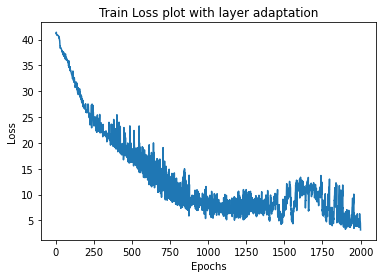

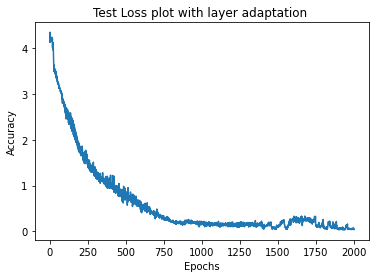

In [23]:
if __name__ == "__main__":     

    trainable=2
    #=== Hyperparameters and Run Options ===#    
    hyperp = Hyperparameters()
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed) 
    
    gauss_solution=np.loadtxt("gauss_solution.data")
    gauss_solution = tf.cast(gauss_solution,tf.float32)
    
    gauss_points = loadmat('gauss_points.mat')
    gauss_points=np.array(list(gauss_points.values()))[-1]
    gauss_points = tf.cast(gauss_points,tf.float32)
    
    gauss_points_new = loadmat('gauss_points_new.mat')
    gauss_points_new=np.array(list(gauss_points_new.values()))[-1]
    gauss_points_new = tf.cast(gauss_points_new,tf.float32)
    
    gauss_weights = loadmat('gauss_weights.mat')
    gauss_weights=np.array(list(gauss_weights.values()))[-1].squeeze(-1)
    
    gauss_weights_new = loadmat('gauss_weights_new.mat')
    gauss_weights_new=np.array(list(gauss_weights_new.values()))[-1].squeeze(-1)

    
    Coordinates = loadmat('Coordinates.mat')
    Coordinates=np.array(list(Coordinates.values()))[-1]
    Coordinates = tf.cast(Coordinates,tf.float32)
    
    
    Stiffness = loadmat('Stiffness.mat')
    Stiffness=np.array(list(Stiffness.values()))[-1]
    Stiffness = tf.cast(Stiffness,tf.float32)
    
    load = loadmat('observation.mat')
    load=np.array(list(load.values()))[-1]
    load=tf.cast(load,tf.float32)
    load=tf.reshape(load,(len(load),1))
    
    Solution = loadmat('Solution.mat')
    Solution=np.array(list(Solution.values()))[-1]
    Solution=tf.cast(Solution,tf.float32)
    Solution=tf.reshape(Solution,(len(Solution),1))
    
    

    v=[]
    for i in range(0,len(Solution)):
        if np.abs(Solution[i])<1e-10:
            v.append(i)
    
    #for i in range(1,hyperp.num_networks):
    for i in range(1,2):
    #=== Initiate training ===#
        #trainer(hyperp, run_options, file_paths,i) 
        if i>1:
            trainable=2

    
            
        if trainable==2:
        
        
        
            #=== GPU Settings ===#
            os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
            os.environ["CUDA_VISIBLE_DEVICES"] = run_options.which_gpu
    
            #=== Neural Network ===#
            if run_options.use_L1 == 0:
                kernel_regularizer = None
                bias_regularizer = None  
            else:
                kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
                bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
            
            
            multiply=0
        
            if multiply==0:

                data_train,new_label,labels_train,load,Solution=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i,load,Stiffness,Coordinates,Solution)
        
            if multiply==1:

                data_train,new_label,labels_train=create_new_multiply(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i)
     
        #=== Construct Validation Set and Batches ===# 
            data_and_labels_train, data_and_labels_val, data_and_labels_test,\
            num_data_train, num_data_val, num_data_test,\
            num_batches_train, num_batches_val, num_batches_test,data_and_labels_train_new\
            = form_train_val_test_batches(data_train, labels_train, \
                                      data_test, labels_test, \
                                      hyperp.batch_size, new_label, run_options.random_seed)
        
        
        if i==1 and trainable==2:
            NN = FCLayerwise(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer)    
            NN._set_inputs( data_train)
        if i>1:
            kernel_regularizer = None
            bias_regularizer = None
            NN = FCLayerwise_new(hyperp_new, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer) 
            NN._set_inputs( data_train)
    #=== Training ===#
    #                                 Training                                    #
###############################################################################
        if trainable>2:
            del NN
            NN = Final(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer,trainable)   
            #NN._set_inputs(data_train)
            NN.load_weights("WEIGHTS"+'/'+"model_weights"+str(1)+str(trainable-1))
            #NN=tf.keras.models.load_model("WEIGHTS"+'/'+"model"+str(1)+str(trainable-1))
        


        if i==1:
            hyperp_n=hyperp
            optimize(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, data_loss_regression, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape,data_train,labels_train,multiply,trainable,compute_interior_loss,gauss_points,gauss_weights,error_L2,gauss_solution,gauss_points_new,gauss_weights_new,Coordinates, Stiffness, load,Solution,v)   
        
        if i>1:
            hyperp_n=Hyperparameters_new()
            optimize_step(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, data_loss_regression, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification_new,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape,data_train,labels_train,multiply,compute_interior_loss,gauss_points,gauss_weights,error_L2,gauss_solution,gauss_points_new,gauss_weights_new,Coordinates, Stiffness, load,Solution,v)   
        
        #NN.save("WEIGHTS"+'/'+"model"+str(1)+str(trainable))
        if not os.path.exists("WEIGHTS"):
            os.makedirs("WEIGHTS")
        NN.save_weights("WEIGHTS"+'/'+"model_weights"+str(1)+str(trainable))
        
        if i==1:
            plot_fig(hyperp, run_options, file_paths,i,trainable+1)
            
        if i>1:
            plot_fig(hyperp_new, run_options, file_paths,i,3)
        
        
        #plot_sine(hyperp,hyperp_new, data_test, run_options, data_input_shape, label_dimensions,2,data_train, labels_train)
        
   
        
        
        
        
        
        
        
        

Text(0, 0.5, 'Accuracy')

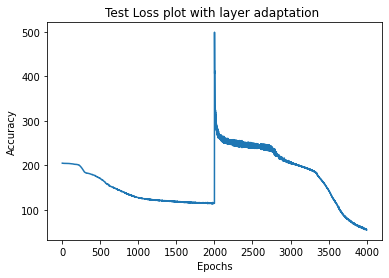

In [82]:
    import matplotlib.pyplot as plt
    
    storage_loss_array=[]
    
    no_epoch=hyperp.num_epochs
    
    for i in range(2,4):
    
        trainable_hidden_layer_index=i
    
    
        name=file_paths.NN_savefile_name + "_metrics_hl" + str(trainable_hidden_layer_index) +str(1)+ '.csv'


        df_metrics =pd.read_csv(name)

        array_metrics = df_metrics.to_numpy()

        
 
        storage_loss_array=np.concatenate((storage_loss_array, array_metrics[:,0]), axis=0)
    
    fig_accuracy = plt.figure()
    x_axis = np.linspace(1, len(storage_loss_array), len(storage_loss_array), endpoint = True)
    plt.plot(x_axis, storage_loss_array)
    #plt.ylim(-5, 60)

#plt.title('Accuracy for: ' + run_options.filename)
    plt.title('Test Loss plot with layer adaptation ')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')


In [10]:
data_train

<tf.Tensor: id=16693, shape=(5000, 2), dtype=float32, numpy=
array([[0.696799  , 0.5       ],
       [0.        , 0.15995109],
       [0.74418575, 0.5       ],
       ...,
       [0.5982862 , 0.5       ],
       [0.        , 0.6563306 ],
       [1.        , 0.18497042]], dtype=float32)>

In [12]:
tf.math.reduce_sum(tf.keras.losses.MSE(Solution, pred))

<tf.Tensor: id=6744890, shape=(), dtype=float32, numpy=178.8639>

In [22]:
G=tf.linalg.inv(Stiffness)

KeyboardInterrupt: 

In [65]:
    trainable=2
    #=== Hyperparameters and Run Options ===#    
    hyperp = Hyperparameters()
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed)               
    
 

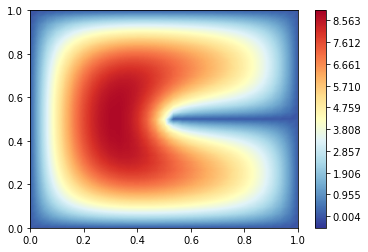

In [11]:
# TRUE SOLUTION

from Utilities.Net import Final_Network
import matplotlib.pyplot as plt

input_plot_data=np.loadtxt("input_plot_data.data")
output_plot_data=np.loadtxt("output_plot_data")


        
x = input_plot_data[:,0]
y = input_plot_data[:,1]

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)


Z=tf.reshape(output_plot_data,np.shape(X))

fig = plt.figure()       

#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.5, 9, 1000)
cs=plt.contourf(X, Y, Z,levels, cmap='RdYlBu_r',vmax=9, vmin=-0.5)     
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 

for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('true_solution_complex.pdf')

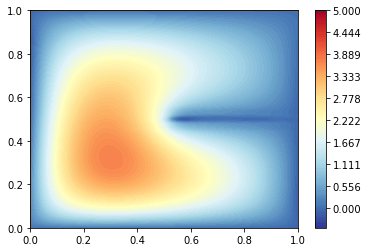

In [26]:
from Utilities.Net import Final_Network
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)
data= tf.cast(d,tf.float32)
Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(12)).expect_partial()
    
y_pred_test_add=Network(data)

        
fig = plt.figure()       
Z=tf.reshape(y_pred_test_add,np.shape(X))
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.5, 5, 100)
cs=plt.contourf(X, Y, Z,levels, cmap='RdYlBu_r',vmax=5, vmin=-0.5)     
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 

for c in cs.collections:
    c.set_rasterized(True)
    
plt.savefig('solution_baseline_transfer.pdf')

In [72]:
# NEURAL NETWORK SOLUTION

from Utilities.Net import Final_Network
import matplotlib.pyplot as plt


i_val=5


x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)
data= tf.cast(d,tf.float32)

#data=data_test


i_val=i_val+1
    
    

for i_net in range(2,i_val+1):
                
    if i_net==2:    
        Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
        Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(1)).expect_partial()
    
        y_pred_test_add=Network(data)
        
    if i_net>2:
        
        if i_net==2 or i_net==3:
            hyperp_new.activation='elu'
            
        if i_net!=2 or i_net!=3:
            hyperp_new.activation='relu'
                
        Network=Final_Network_ALGO_II( hyperp_new,run_options, data_input_shape, label_dimensions) 
        
        Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
        y_pred_test_add=y_pred_test_add+Network(data)
        

        


     
fig = plt.figure()       
#Z=tf.reshape((output_plot_data-y_pred_test_add[:,0]),np.shape(X))
Z=tf.reshape((y_pred_test_add),np.shape(X))
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.5, 9, 1000)
cs=plt.contourf(X, Y, Z,levels, cmap='RdYlBu_r',vmax=9, vmin=-0.5)     
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 


for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('AlgoII_four_complex.pdf')

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for WEIGHTS/model_weights5

In [43]:
(Network(data_test))

<tf.Tensor: id=535, shape=(7000, 1), dtype=float32, numpy=
array([[-2.0336058],
       [-3.6118617],
       [-2.9009166],
       ...,
       [-3.6664746],
       [-3.652674 ],
       [-3.6985552]], dtype=float32)>

In [33]:
#plot_sine(hyperp,hyperp_new, data_test, run_options, data_input_shape, label_dimensions,2,data_train, labels_train,labels_test)
Network(data_test)

ValueError: Tensor's shape (2, 20) is not compatible with supplied shape [2, 100]

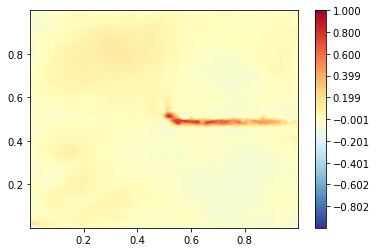

In [57]:
# PLOT ERROR MAP

from Utilities.Net import Final_Network
import matplotlib.pyplot as plt


i_val=3



data= data_test


i_val=i_val+1
    
    
if i_val>1:
    for i_net in range(2,i_val+1):
                
        if i_net==2:    
            Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
            y_pred_test_add=Network(data)
        
        if i_net>2:
                
            Network=Final_Network_ALGO_II( hyperp_new,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
            y_pred_test_add=y_pred_test_add+Network(data)
        

x = data_test[:,0]
y = data_test[:,1]
     
     
fig = plt.figure()   
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-1, 1, 1000)
cs = plt.tricontourf(x, y, labels_test-y_pred_test_add[:,0], levels, cmap='RdYlBu_r', vmax=1, vmin=-1)
plt.colorbar(cs)


for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('error_first_complex.pdf')



In [41]:
k=1
for i in range(0,len(data_test)):
    if data_test[i,1]<0.5001 and data_test[i,1]>0.499:
        k=i

In [42]:
k

6830

In [34]:
data_test[6830]

<tf.Tensor: id=401288, shape=(2,), dtype=float32, numpy=array([0.8151789 , 0.49979362], dtype=float32)>

In [35]:
labels_test[6830]

<tf.Tensor: id=401292, shape=(), dtype=float32, numpy=0.007663433>

In [56]:
y_pred_test_add[6830]

<tf.Tensor: id=467068, shape=(1,), dtype=float32, numpy=array([0.30428118], dtype=float32)>